# Importing the libraries

In [33]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
import keras
import matplotlib.pyplot as plt

# Loading the neural network

In [34]:

network = keras.models.load_model("network.keras", compile=False)
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,428 (700.89 KB)

 Trainable params: 179,428 (700.89 KB)

 Non-trainable params: 0 (0.00 B)

# Loading the test image

(-0.5, 729.5, 284.5, -0.5)

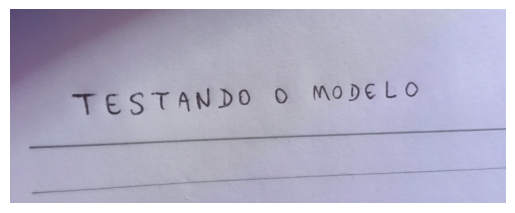

In [35]:
img = cv2.imread('Images//test-manuscript01.jpg')
plt.imshow(img)
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

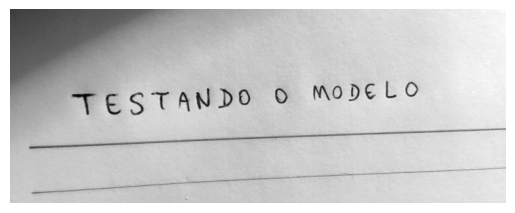

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis("off")

# Pre-processing the image

(-0.5, 729.5, 284.5, -0.5)

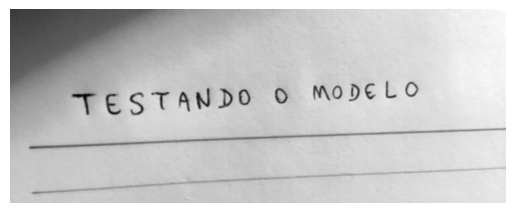

In [37]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(blur, cmap='gray')
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

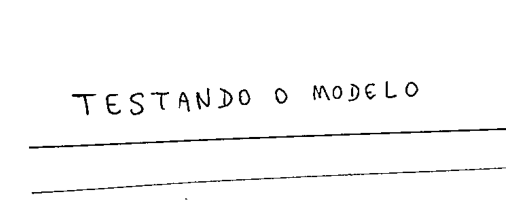

In [38]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive, cmap='gray')
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

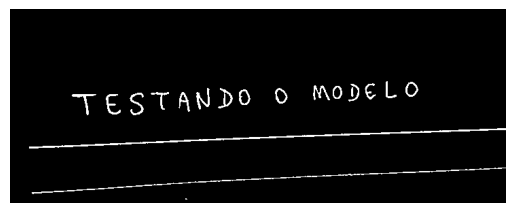

In [39]:
invertion = 255 - adaptive
plt.imshow(invertion, cmap='gray')
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

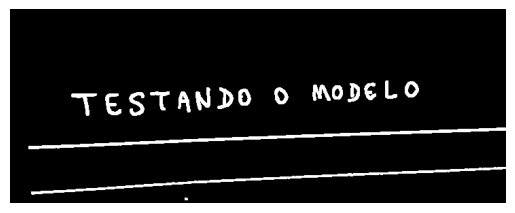

In [40]:
dilation = cv2.dilate(invertion, np.ones((3,3)))
plt.imshow(dilation, cmap='gray')
plt.axis("off")

In [41]:
# edges = cv2.Canny(dilation, 40, 150)
# plt.imshow(edges, cmap='gray')
# plt.axis("off")

In [42]:
# dilation = cv2.dilate(edges, np.ones((3,3)))
# plt.imshow(dilation, cmap='gray')
# plt.axis("off")

# Contour detection

In [43]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method = 'left-to-right')[0]
  return conts

In [44]:
conts = find_contours(dilation.copy())

In [45]:
# conts

In [46]:
# min_w, max_w = 4, 160
# min_h, max_h = 14, 140
# img_copy = img.copy()
# for c in conts:
#   #print(c)
#   (x, y, w, h) = cv2.boundingRect(c)
#   #print(x, y, w, h)
#   if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
#     roi = gray[y:y+h, x:x+w]
#     #cv2_imshow(roi)
#     thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
#     cv2_imshow(thresh)
#     cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 100, 0), 2)
# cv2_imshow(img_copy)

In [47]:
# plt.imshow(img_copy)

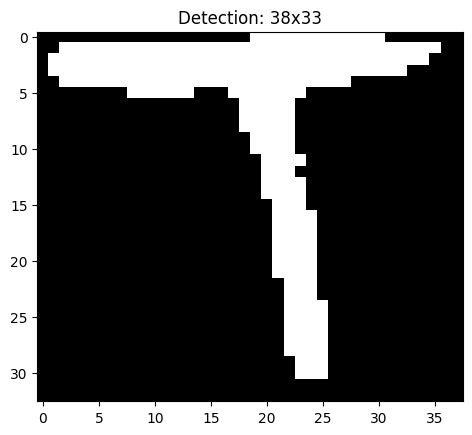

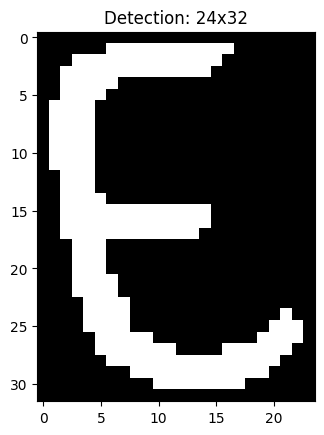

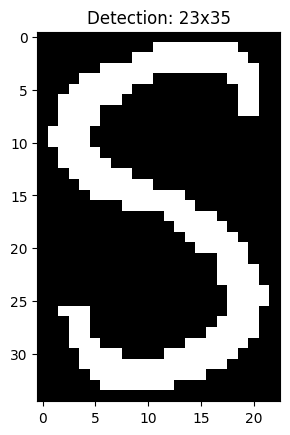

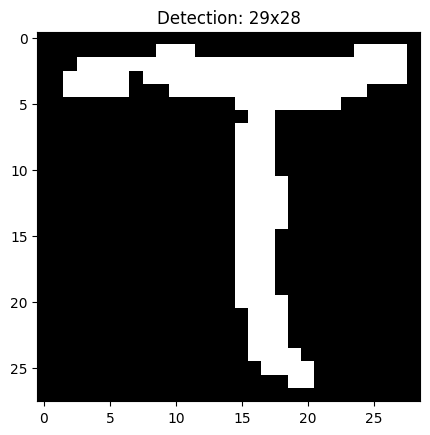

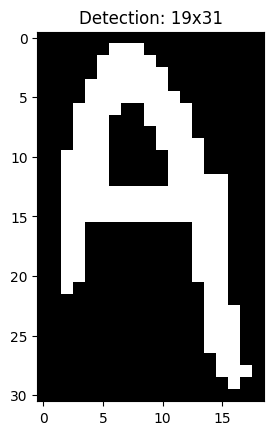

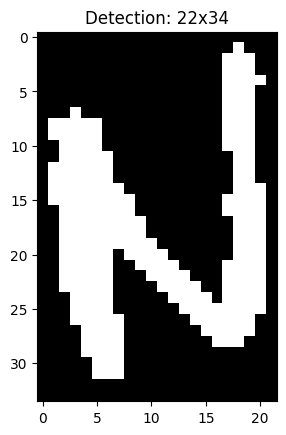

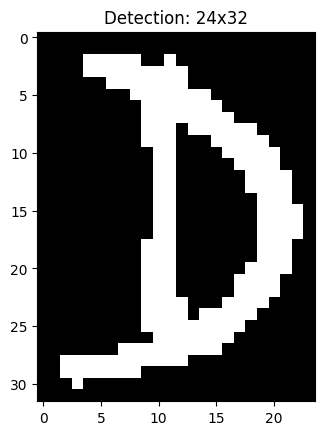

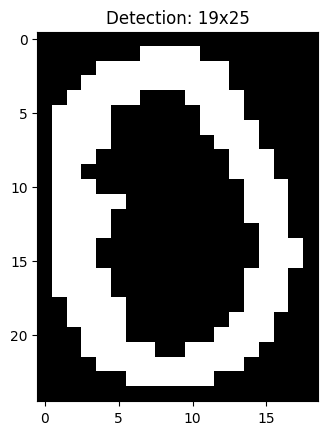

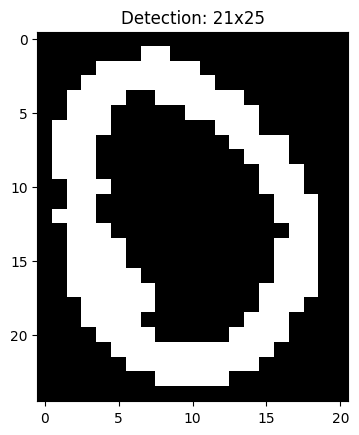

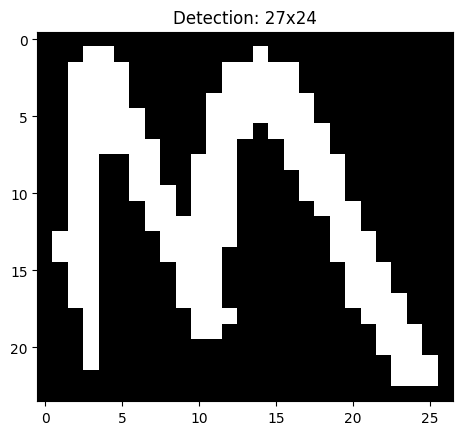

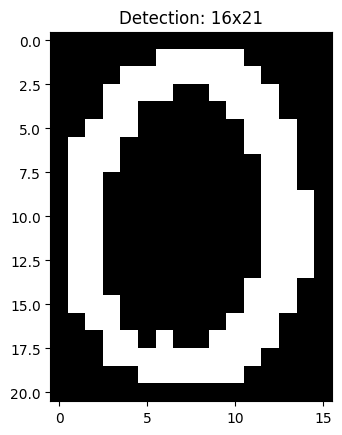

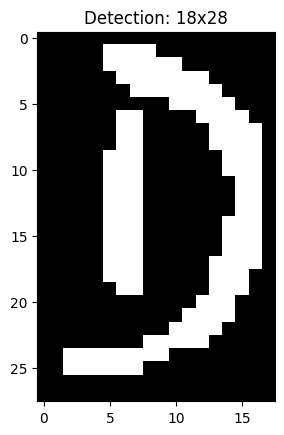

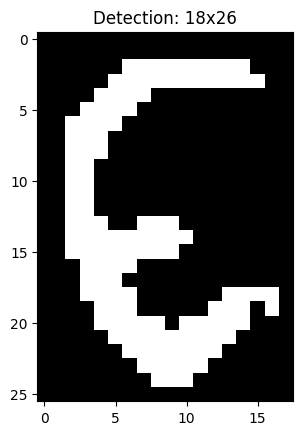

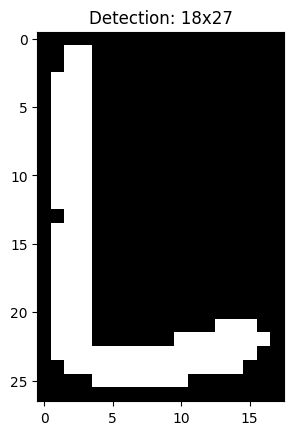

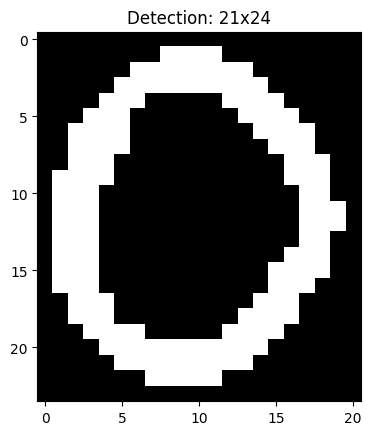

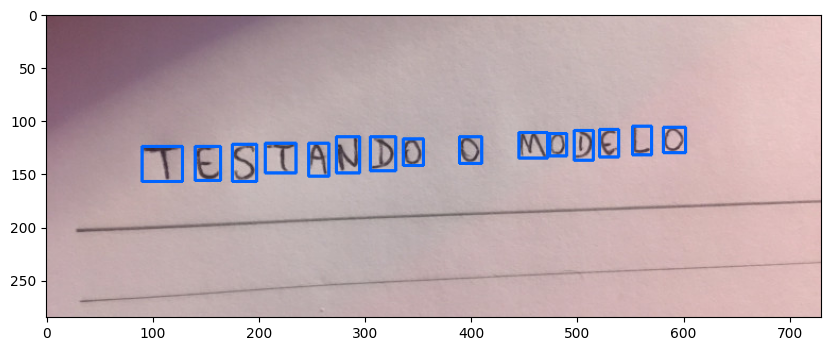

In [48]:
import matplotlib.pyplot as plt

min_w, max_w = 4, 160
min_h, max_h = 14, 140
img_copy = img.copy()

for c in conts:
    (x, y, w, h) = cv2.boundingRect(c)
    if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        roi = gray[y:y+h, x:x+w]
        thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        
        # FIX: Use matplotlib to show the thresholded ROI
        plt.imshow(thresh, cmap="gray")
        plt.title(f"Detection: {w}x{h}")
        plt.show() # <--- REQUIRED: This forces Jupyter to print the current image now
        
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 100, 0), 2)

# Final display of the image with all boxes
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for Matplotlib
plt.show()


# Processing the detected characters

## ROI extraction

In [49]:
def extract_roi(img):
  roi = img[y:y + h, x:x + w]
  return roi

In [50]:
## Thresholding

In [51]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  return thresh

In [52]:
## Resizing

In [53]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width = 28)
  else:
    resized = imutils.resize(img, height = 28)

  (h, w) = resized.shape
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value = (0,0,0))
  filled = cv2.resize(filled, (28,28))
  return filled

247 121 19 31


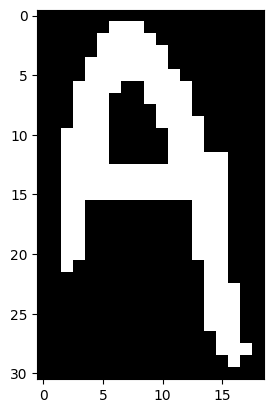

In [54]:
(x, y, w, h) = cv2.boundingRect(conts[6])
print(x, y, w, h)
test_img = thresholding(gray[y:y+h, x:x+w])
plt.imshow(test_img, cmap="gray")


31 19
(28, 28)


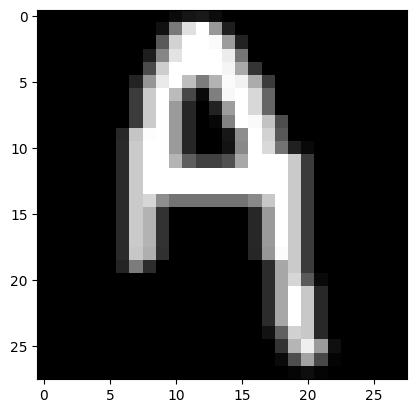

In [55]:
(h, w) = test_img.shape
print(h, w)
test_img2 = resize_img(test_img, w, h)
plt.imshow(test_img2, cmap="gray")
print(test_img2.shape)

## Normalization

In [56]:
def normalization(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis = -1)
  return img

In [57]:
test_img2.shape, normalization(test_img2).shape

((28, 28), (28, 28, 1))

## Processing the detections

In [58]:
characters = []

In [59]:
# def process_box(gray, x, y, w, h):
#   roi = extract_roi(gray)
#   thresh = thresholding(roi)
#   (h, w) = thresh.shape
#   resized = resize_img(thresh, w, h)
#   plt.imshow(resized)
#   normalized = normalization(resized)
#   characters.append((normalized, (x, y, w, h)))


def process_box(gray, x, y, w, h):
  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)
  
  # FIX: Add plt.show() to print the image immediately in Jupyter
  plt.imshow(resized, cmap="gray")
  plt.title(f"Processed: {x},{y}")
  plt.show() 
  
  normalized = normalization(resized)
  characters.append((normalized, (x, y, w, h)))

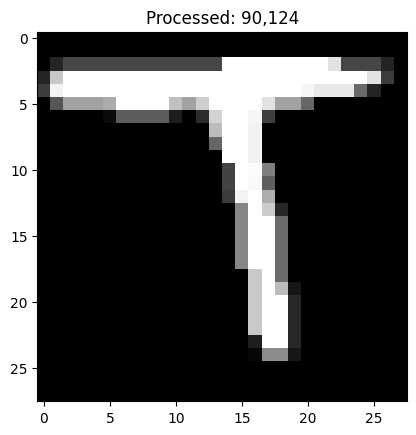

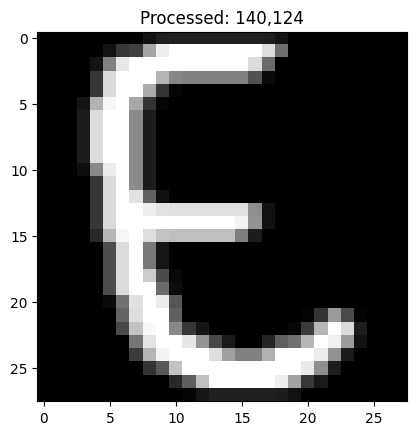

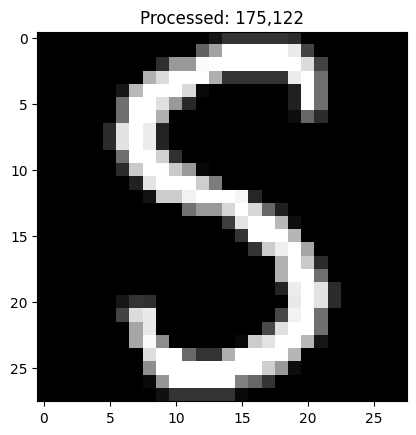

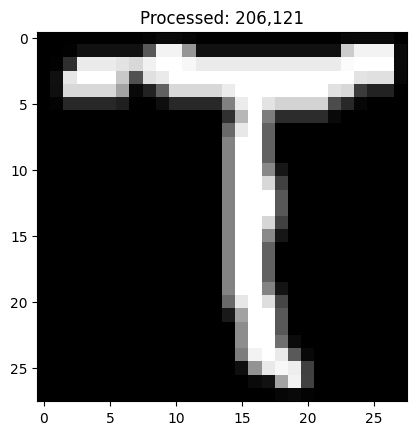

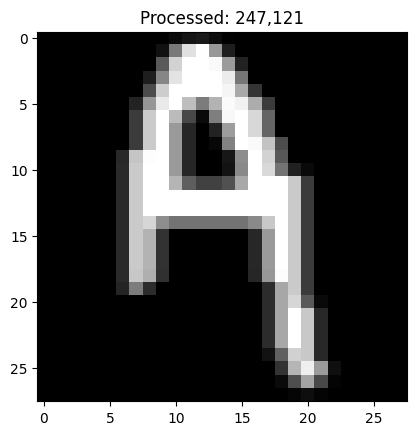

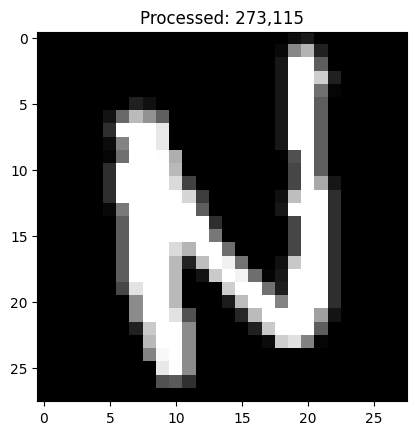

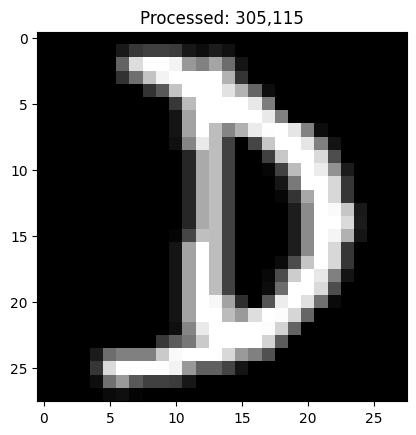

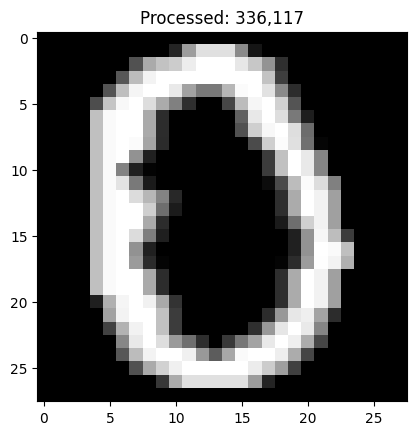

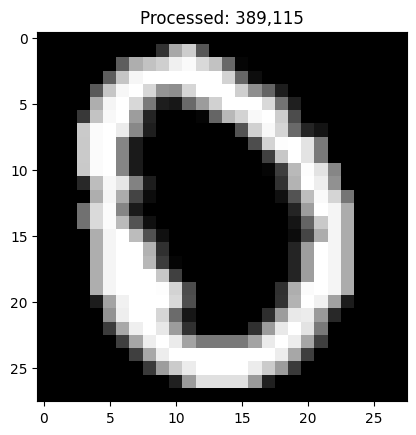

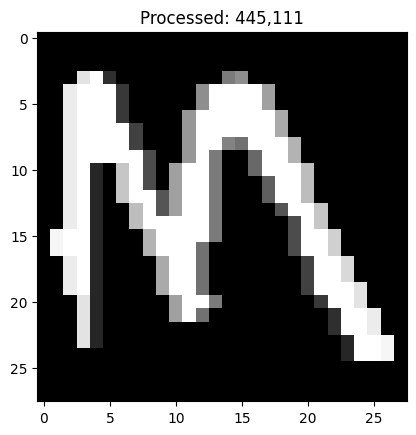

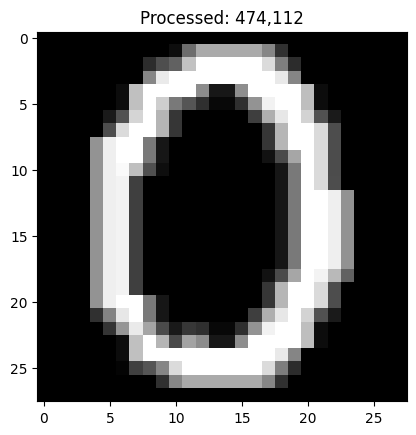

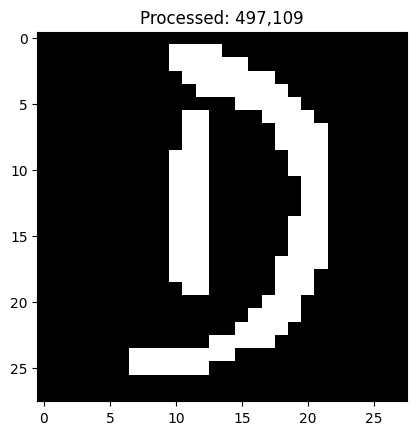

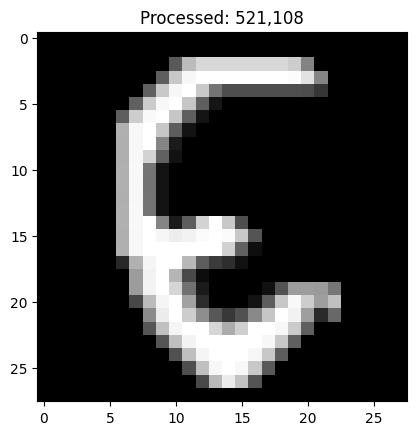

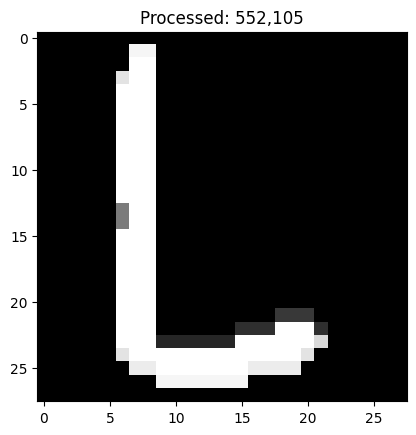

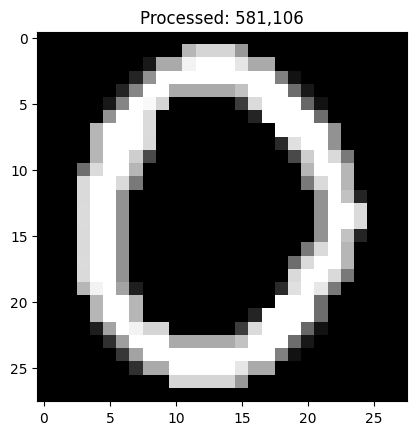

In [60]:
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

In [61]:
# characters[0]

In [62]:
boxes = [box[1] for box in characters]
boxes

[(90, 124, 38, 33),
 (140, 124, 24, 32),
 (175, 122, 23, 35),
 (206, 121, 29, 28),
 (247, 121, 19, 31),
 (273, 115, 22, 34),
 (305, 115, 24, 32),
 (336, 117, 19, 25),
 (389, 115, 21, 25),
 (445, 111, 27, 24),
 (474, 112, 16, 21),
 (497, 109, 18, 28),
 (521, 108, 18, 26),
 (552, 105, 18, 27),
 (581, 106, 21, 24)]

In [63]:
pixels = np.array([pixel[0] for pixel in characters], dtype = 'float32')

In [64]:
pixels

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.14509805],
         [0.27450982],
         ...,
         [0.27450982],
         [0.14509805],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [65]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters_list = digits + letters
characters_list = [l for l in characters_list]

In [66]:
print(characters_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [67]:
pixels[0].shape

(28, 28, 1)

In [68]:
pixels.shape

(15, 28, 28, 1)

In [70]:
predictions = network.predict(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [71]:
predictions

array([[0.00000000e+00, 4.48959268e-15, 3.81438292e-23, 0.00000000e+00,
        1.68556387e-26, 3.94189997e-13, 9.16485808e-32, 2.95630084e-14,
        9.26081768e-21, 4.55582302e-31, 3.52541597e-29, 4.34986585e-39,
        4.14449690e-11, 9.43488383e-32, 5.84504582e-22, 6.43387853e-19,
        1.94454941e-09, 1.60144923e-22, 3.26571004e-26, 2.65088858e-08,
        1.10193184e-07, 7.18526303e-19, 1.87234050e-15, 5.44703436e-16,
        4.25061160e-08, 2.34241567e-11, 3.08916246e-41, 3.85384201e-31,
        1.75244177e-11, 9.99999642e-01, 2.06327314e-07, 1.02860207e-17,
        2.04638789e-21, 6.10997039e-13, 4.07039238e-08, 9.47847147e-15],
       [1.24487650e-25, 1.50780734e-32, 2.90410465e-23, 1.56945428e-42,
        1.29812890e-28, 6.42328166e-16, 1.69786490e-10, 0.00000000e+00,
        4.51620183e-18, 7.35681694e-43, 6.26747727e-31, 1.48937804e-08,
        2.76978477e-04, 1.22765741e-12, 9.99723017e-01, 9.41899319e-20,
        3.99548253e-14, 1.38324787e-29, 1.21819079e-40, 5.69426

In [72]:
predictions.shape

(15, 36)

T  ->  99.99996423721313
E  ->  99.97230172157288
S  ->  97.18918204307556
T  ->  99.93569254875183
A  ->  99.99997615814209
N  ->  99.99927282333374
D  ->  99.99978542327881
0  ->  69.1578209400177
O  ->  74.88394975662231
M  ->  99.30279850959778
0  ->  61.900919675827026
D  ->  99.97672438621521
E  ->  99.99889135360718
L  ->  100.0
0  ->  86.87102198600769


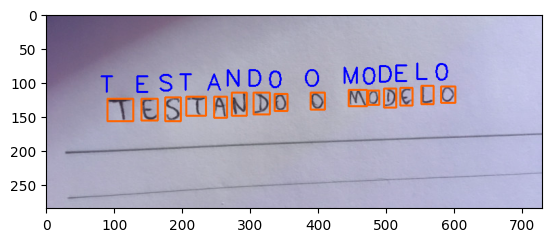

In [73]:
img_copy = img.copy()
for (prediction, (x, y, w, h)) in zip(predictions, boxes):
  i = np.argmax(prediction)
  #print(i)
  probability = prediction[i]
  #print(probability)
  character = characters_list[i]
  #print(character)

  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_copy, character, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(character, ' -> ', probability * 100)

  plt.imshow(img_copy)

In [74]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y + h, x - margin:x + w + margin]
  return roi

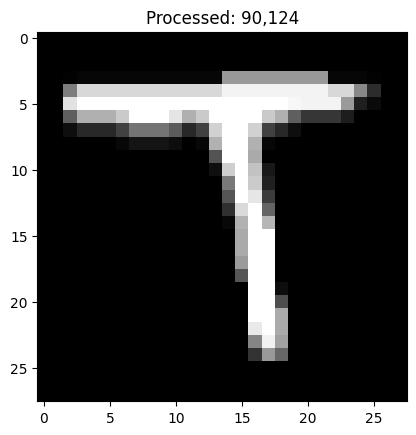

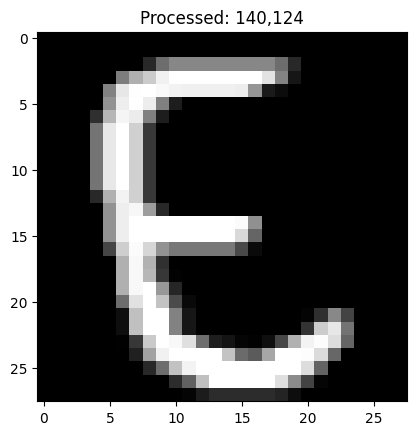

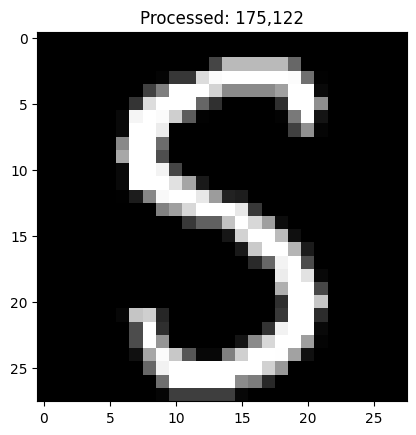

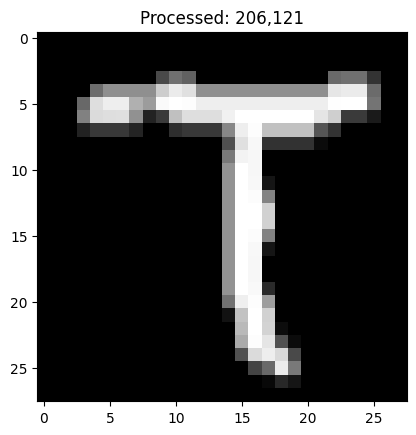

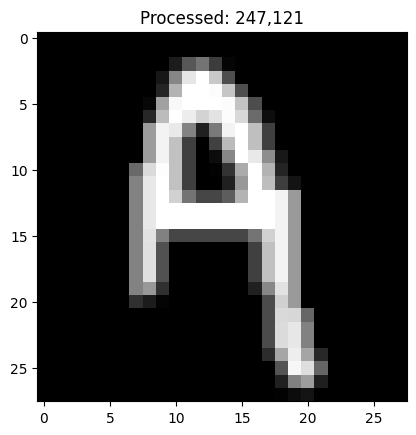

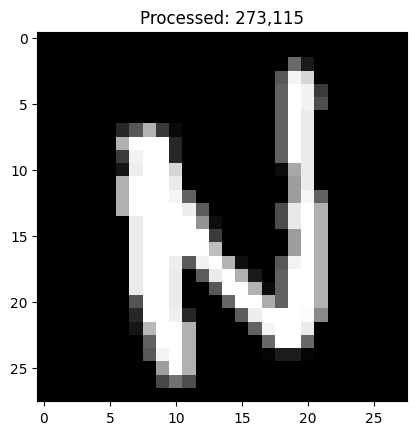

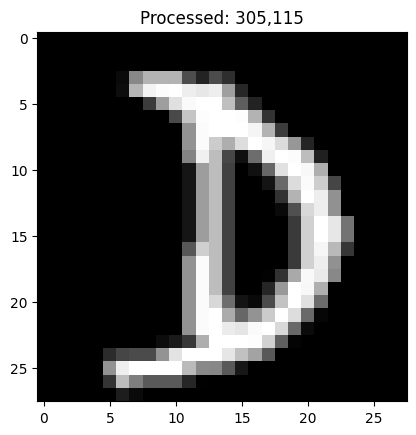

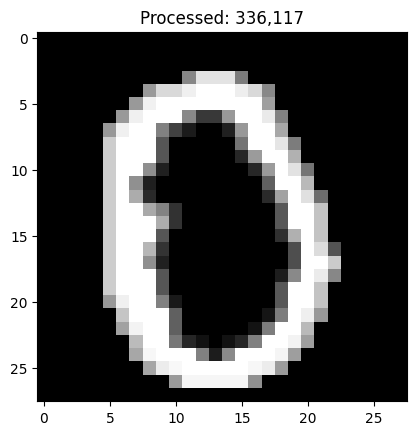

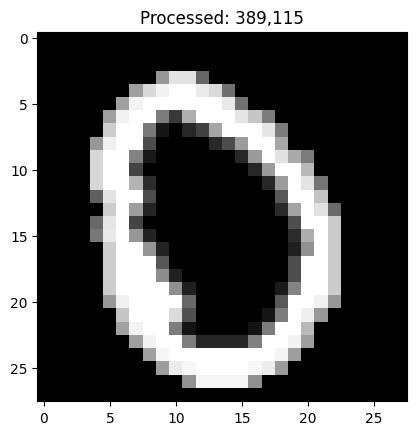

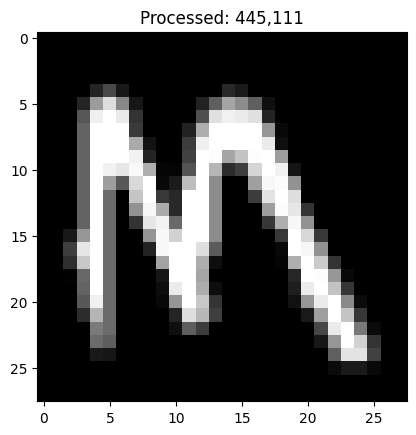

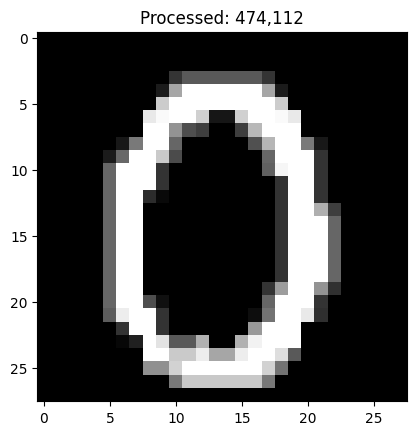

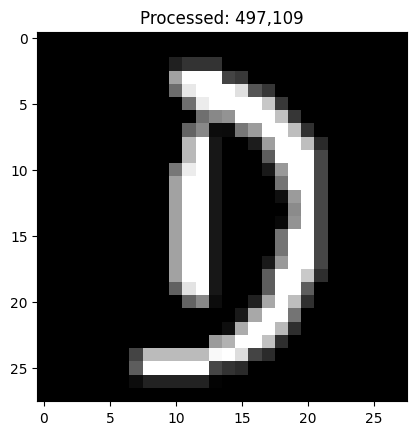

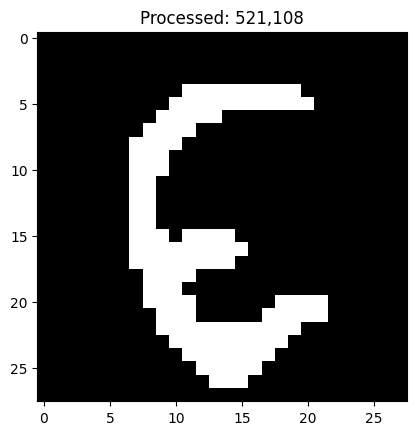

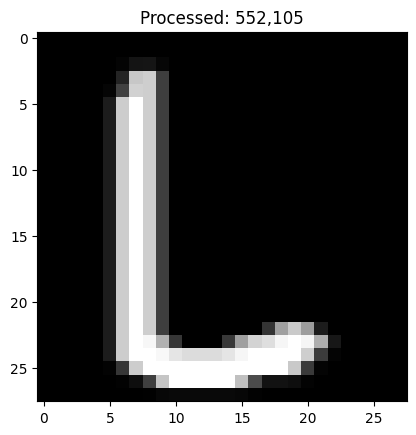

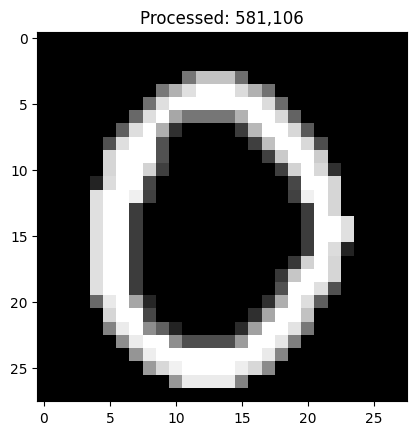

In [75]:
conts = find_contours(dilation.copy())
characters = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

In [76]:
boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype='float32')
predictions = network.predict(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


T  ->  99.99809265136719
E  ->  99.99991655349731
S  ->  99.01988506317139
T  ->  99.83541965484619
A  ->  100.0
N  ->  99.99419450759888
D  ->  99.99905824661255
0  ->  50.90293288230896
O  ->  58.97974967956543
M  ->  99.98656511306763
0  ->  88.69739770889282
D  ->  99.99804496765137
E  ->  99.598628282547
L  ->  100.0
0  ->  82.45293498039246


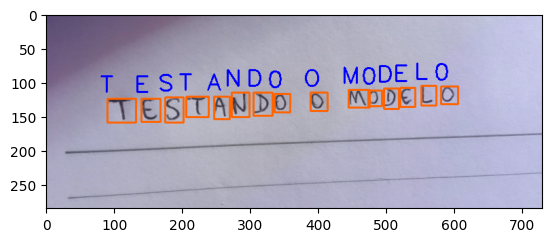

In [77]:
img_copy = img.copy()
for (prediction, (x, y, w, h)) in zip(predictions, boxes):
  i = np.argmax(prediction)
  probability = prediction[i]
  character = characters_list[i]
  
  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_copy, character, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(character, ' -> ', probability * 100)

  plt.imshow(img_copy)

# Other tests

In [78]:
def preprocess_img(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3, 3), 7)
  edges = cv2.Canny(blur, 40, 150)
  dilation = cv2.dilate(edges, np.ones((3,3)))  
  return gray, dilation

In [79]:
def prediction(predictions, characters_list):
  i = np.argmax(predictions)
  probability = predictions[i]
  character = characters_list[i]
  return i, probability, character

In [80]:
def draw_img(img_cp, character):
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
  cv2.putText(img_cp, character, (x - 10, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255), 2)

## Problems with 0 and O, 1 an I, 5 and S

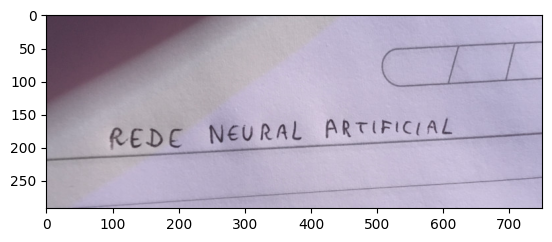

In [81]:
img = cv2.imread('Images/test_manuscript02.jpg')
plt.imshow(img)

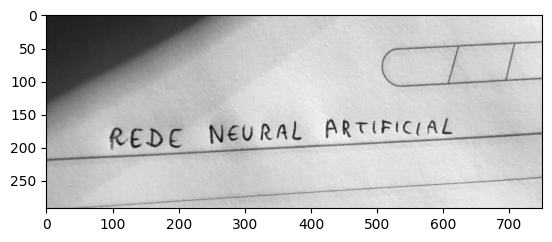

In [83]:
gray, processed_img = preprocess_img(img)
plt.imshow(gray, cmap="gray")


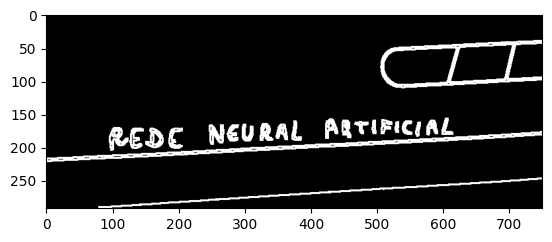

In [85]:
plt.imshow(processed_img, cmap="gray")

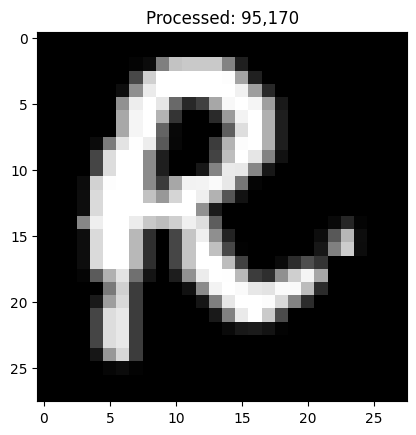

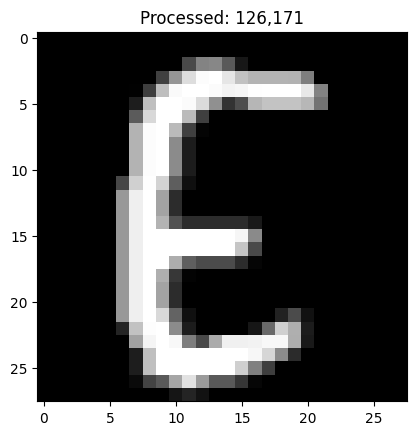

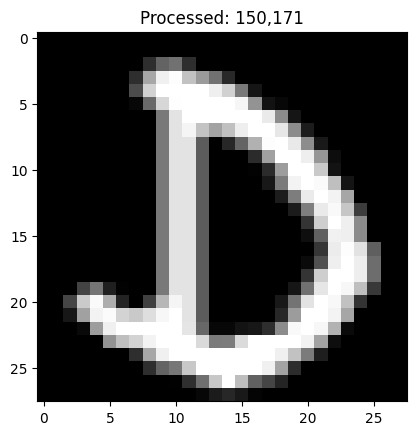

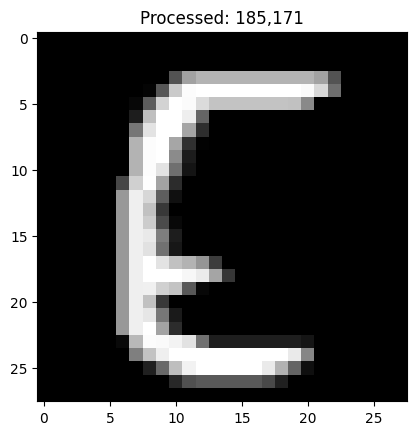

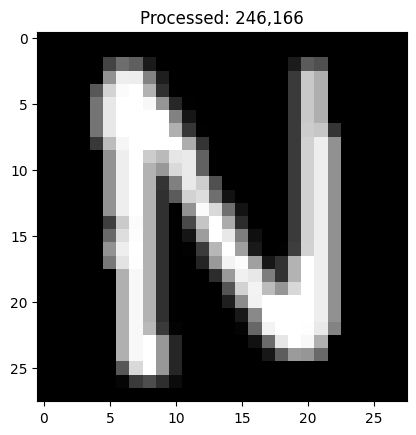

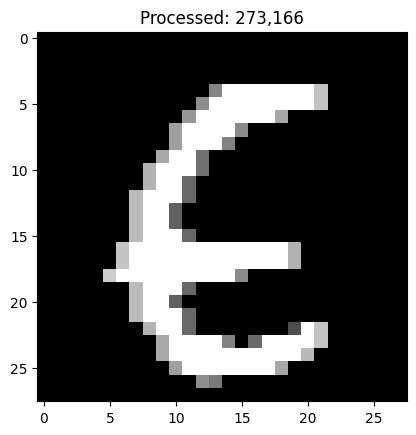

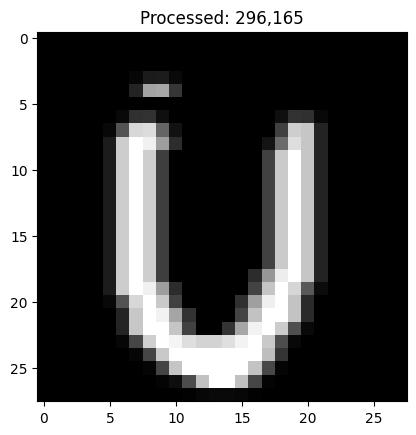

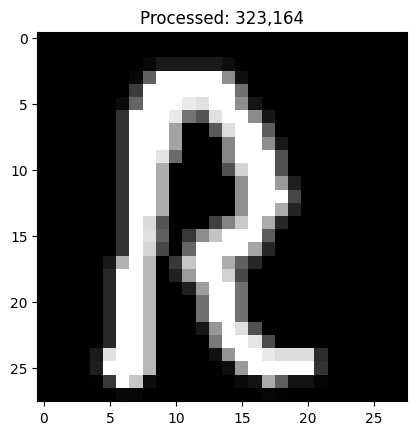

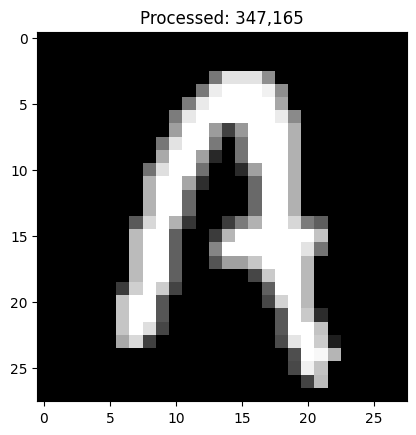

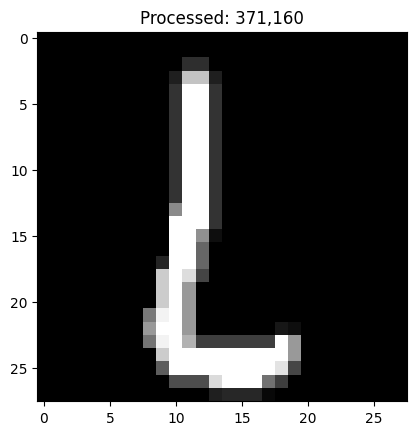

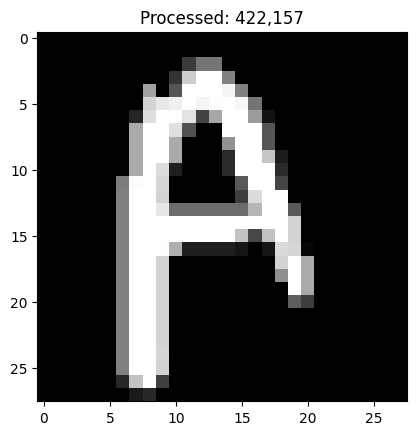

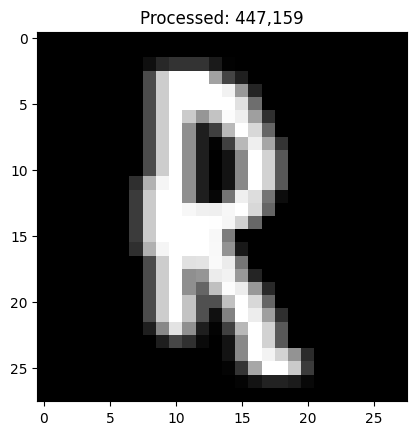

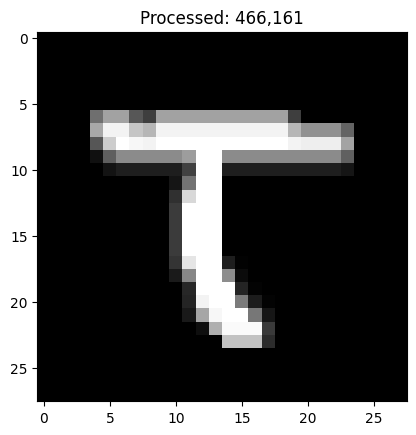

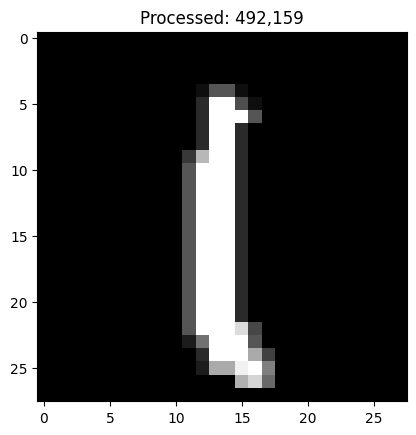

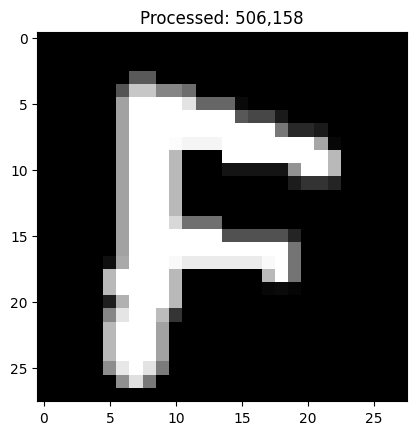

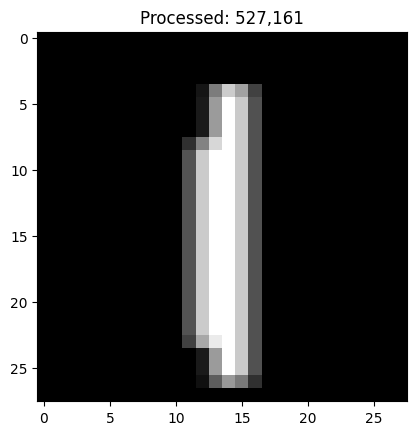

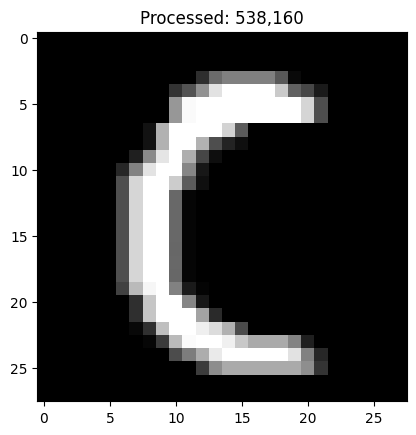

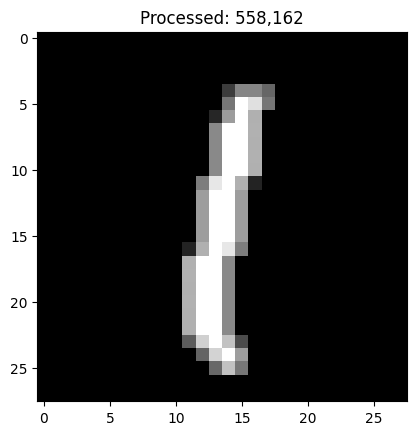

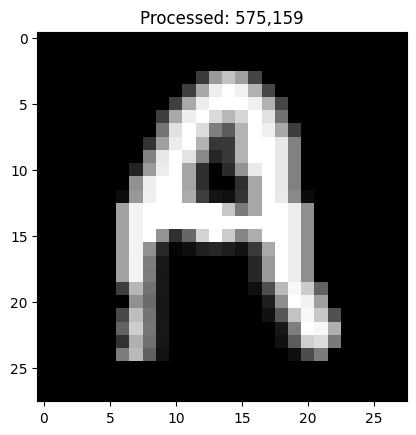

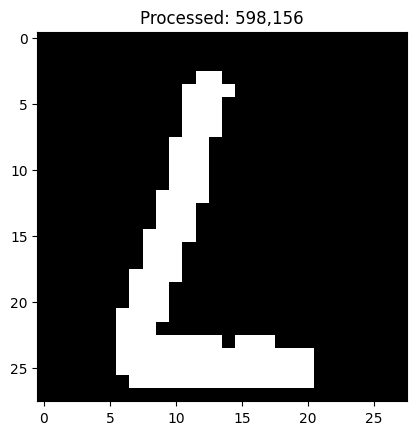

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [87]:
conts = find_contours(processed_img.copy())
characters = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype="float32")
predictions = network.predict(pixels)

In [88]:
digits_2 = 'OI234S6789'
letters_2 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters_list_2 = digits_2 + letters_2
characters_list_2 = [l for l in characters_list_2]

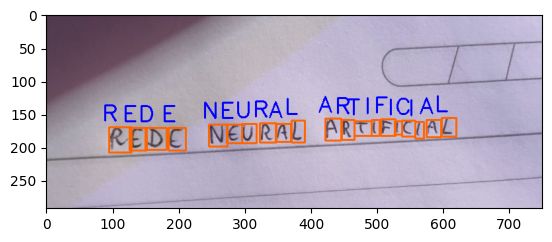

In [89]:
img_cp = img.copy()
for (pred, (x, y, w, h)) in zip(predictions, boxes):
  i, probability, character = prediction(pred, characters_list_2)
  draw_img(img_cp, character)
plt.imshow(img_cp)

## Problems with undetected texts

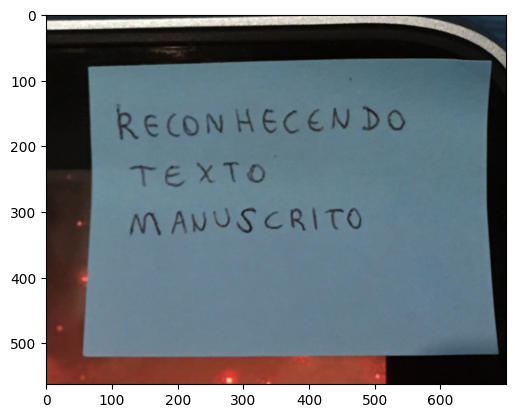

In [91]:
img = cv2.imread('Images/test_manuscript03.jpg')
plt.imshow(img)

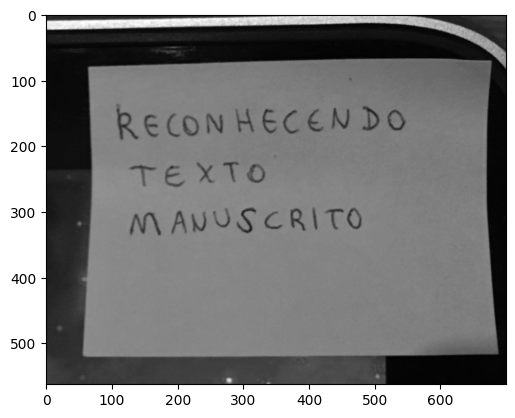

In [92]:
gray, processed_img = preprocess_img(img)
plt.imshow(gray,cmap="gray")


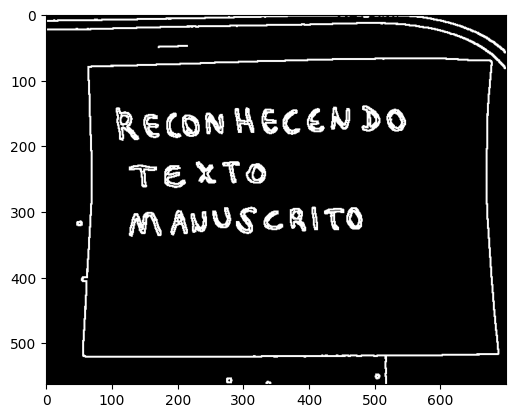

In [93]:
plt.imshow(processed_img,cmap="gray")

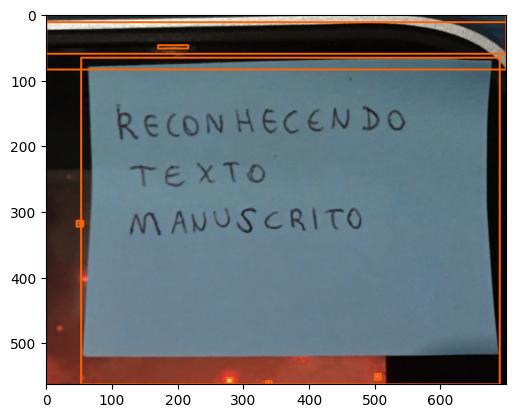

In [94]:
conts = find_contours(processed_img.copy()) # RETR_EXTERNAL
img_cp = img.copy()
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  #if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
  roi = gray[y:y + h, x:x + w]
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
plt.imshow(img_cp)

In [95]:
height, width = img.shape[:2]
print(height, width)

563 700


In [96]:
contours_size = sorted(conts, key=cv2.contourArea, reverse=True)
contours_size

[array([[[500,  66]],
 
        [[499,  67]],
 
        [[435,  67]],
 
        [[434,  68]],
 
        [[397,  68]],
 
        [[396,  69]],
 
        [[363,  69]],
 
        [[362,  70]],
 
        [[321,  70]],
 
        [[320,  71]],
 
        [[292,  71]],
 
        [[291,  72]],
 
        [[256,  72]],
 
        [[255,  73]],
 
        [[234,  73]],
 
        [[233,  74]],
 
        [[203,  74]],
 
        [[202,  75]],
 
        [[167,  75]],
 
        [[166,  76]],
 
        [[138,  76]],
 
        [[137,  77]],
 
        [[ 98,  77]],
 
        [[ 97,  78]],
 
        [[ 68,  78]],
 
        [[ 67,  79]],
 
        [[ 63,  79]],
 
        [[ 63, 101]],
 
        [[ 64, 102]],
 
        [[ 64, 122]],
 
        [[ 65, 123]],
 
        [[ 65, 156]],
 
        [[ 66, 157]],
 
        [[ 66, 184]],
 
        [[ 67, 185]],
 
        [[ 67, 208]],
 
        [[ 68, 209]],
 
        [[ 68, 287]],
 
        [[ 67, 288]],
 
        [[ 67, 304]],
 
        [[ 66, 305]],
 
        [[ 66, 3

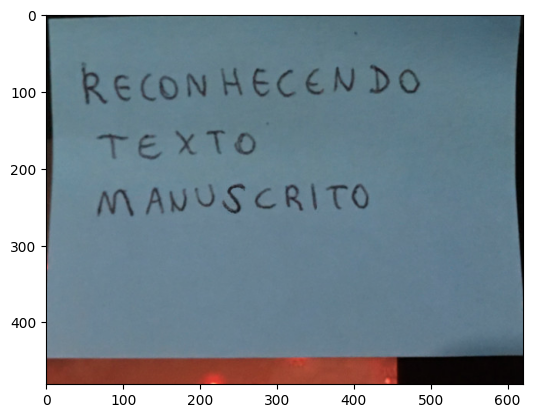

In [98]:
for c in contours_size:
  (x, y, w, h) = cv2.boundingRect(c)

  if (w >= (width / 2)) and (h >= height / 2):
    cut_off = 8
    cut_img = img[y+cut_off:y + h - cut_off, x+cut_off:x + w - cut_off]
    plt.imshow(cut_img)

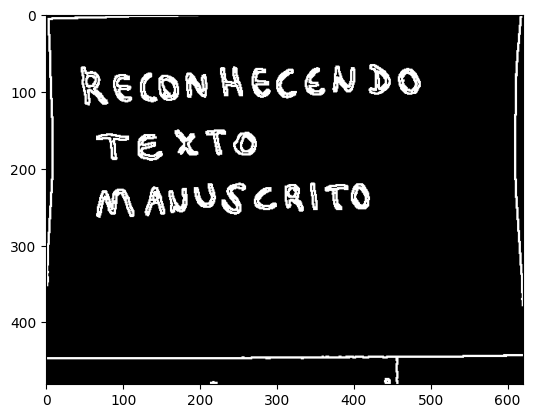

In [99]:
gray, processed_img = preprocess_img(cut_img)
plt.imshow(processed_img,cmap="gray")

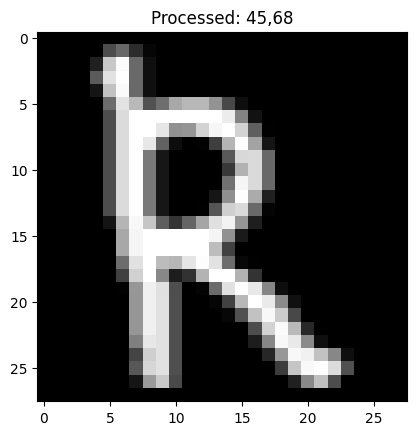

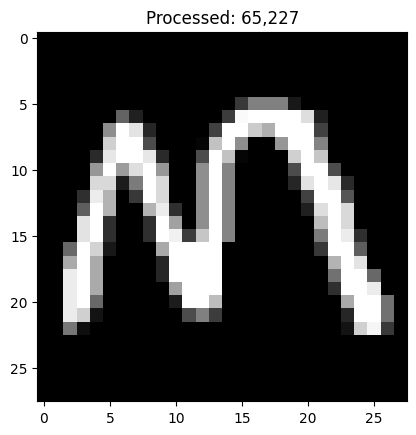

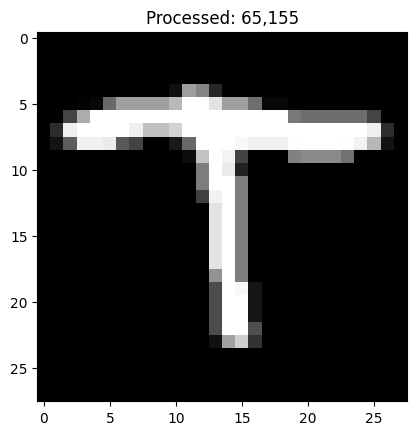

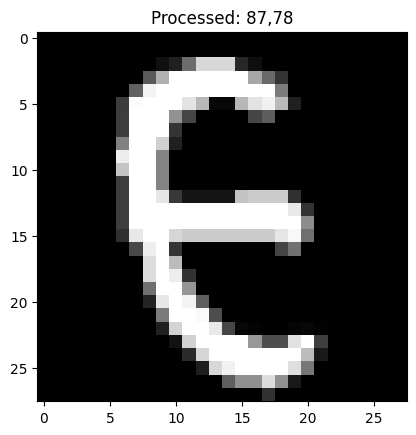

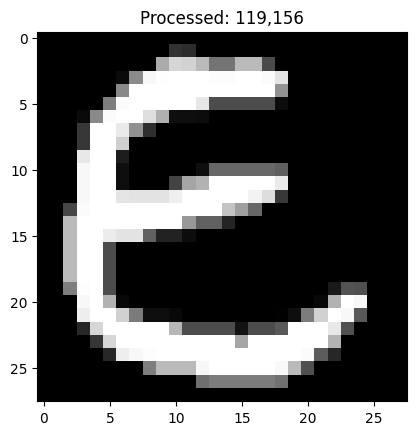

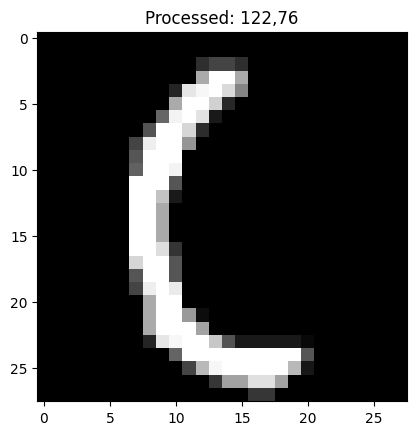

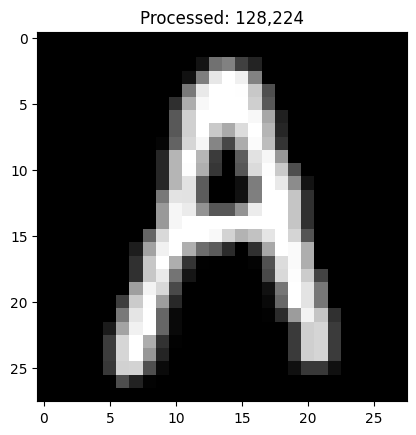

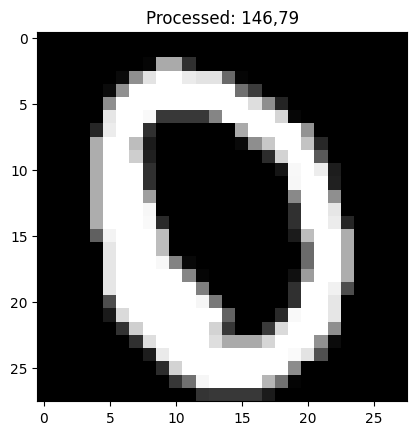

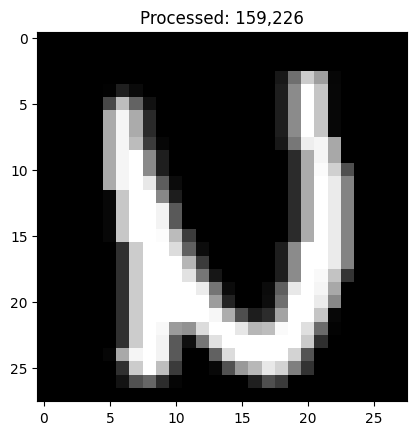

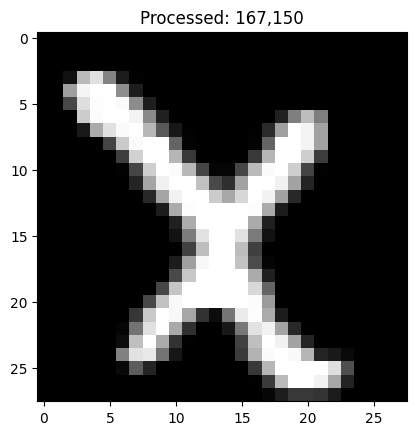

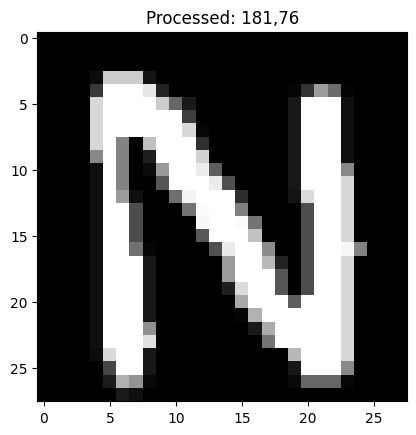

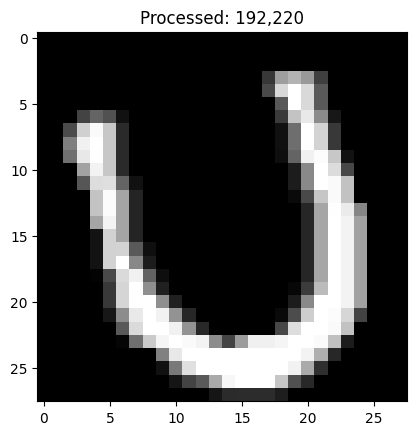

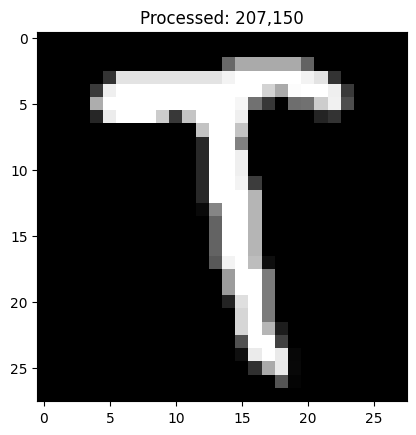

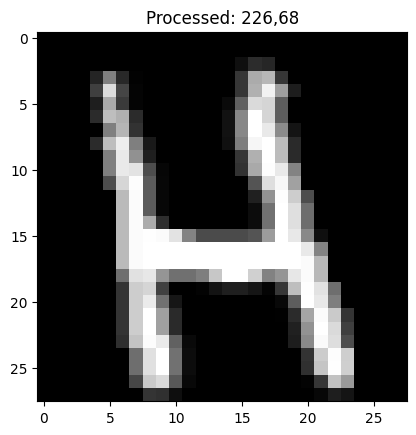

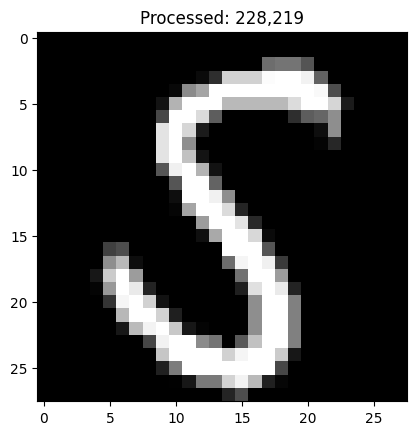

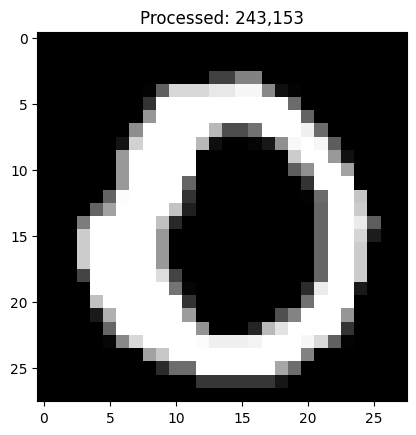

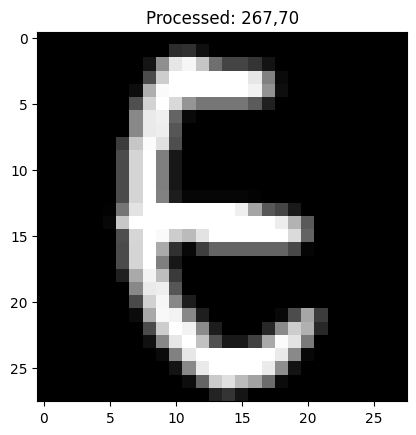

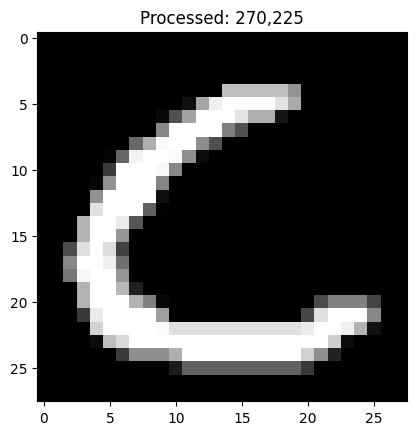

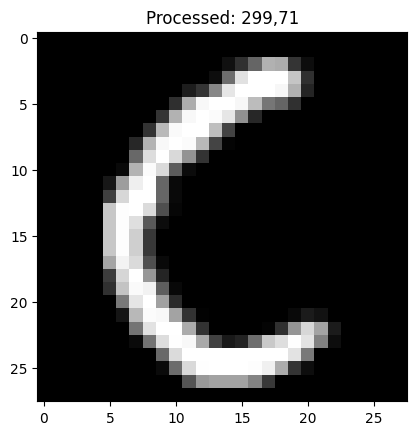

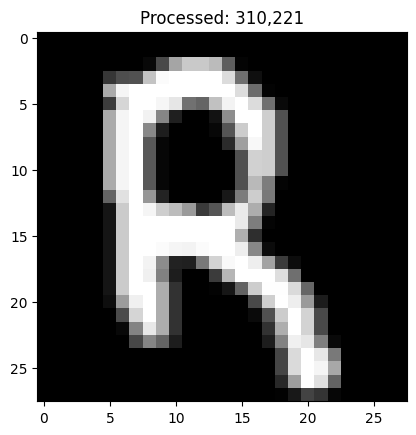

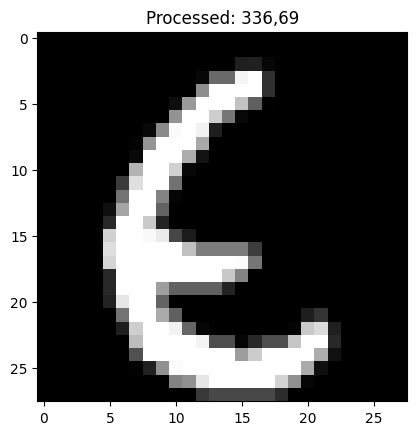

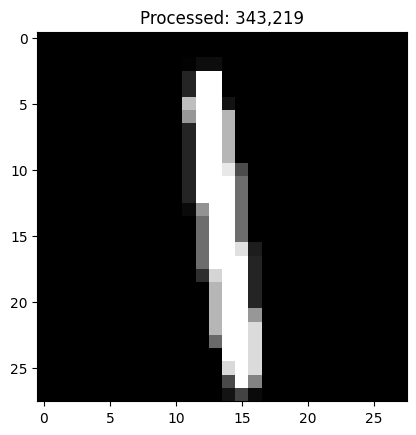

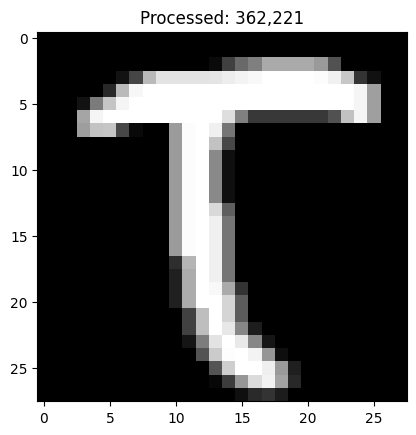

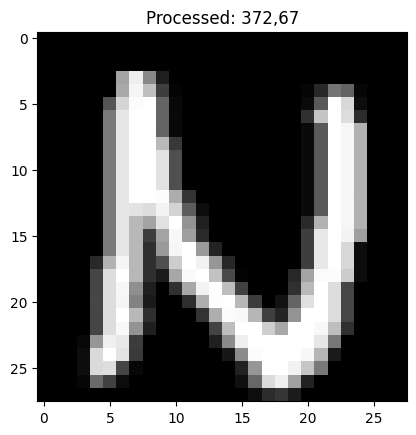

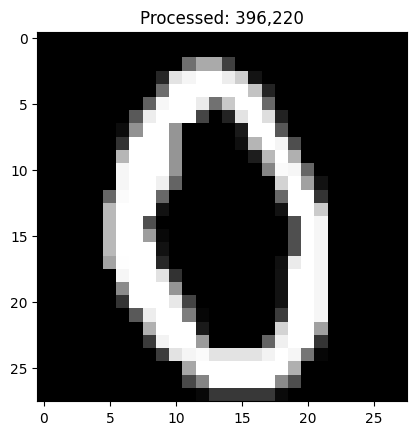

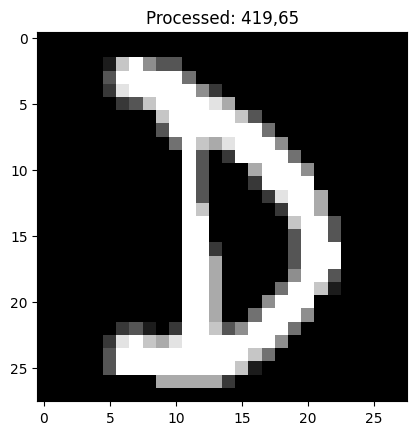

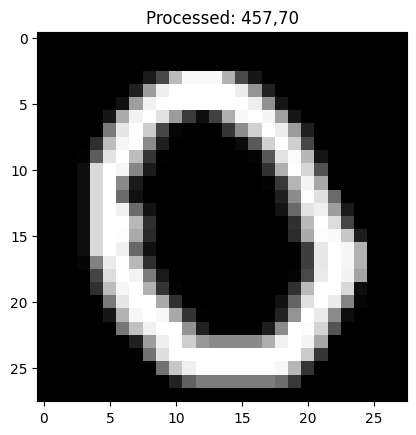

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


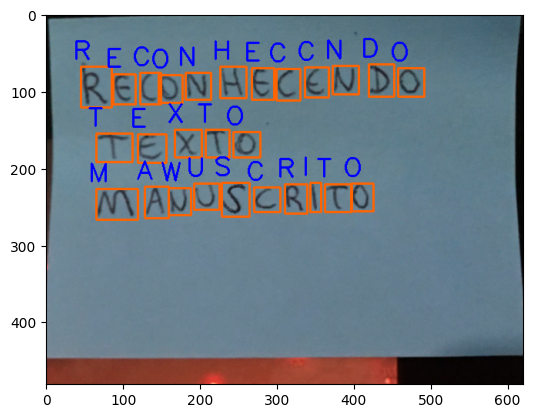

In [101]:
conts = find_contours(processed_img.copy())
characters = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype="float32")
predictions = network.predict(pixels)

img_cp = cut_img.copy()
for (pred, (x, y, w, h)) in zip(predictions, boxes):
  i, probability, character = prediction(pred, characters_list_2)
  draw_img(img_cp, character)
plt.imshow(img_cp)